In [1]:
"""
    Author: Ashutosh Kumar
    Article: Different methods for handling skewed data
"""

'\n    Author: Ashutosh Kumar\n    Article: Different methods for handling skewed data\n'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importing boston housing data
from sklearn.datasets import load_boston
boston = load_boston()

X = boston['data']
Y = boston['target']
cols = boston['feature_names']

df = pd.DataFrame(X, columns = cols)
df['Price'] = Y
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [6]:
# determine index for numeric features -> this toy datset has all numeric features but still setting the automated pipeline
num_feats = df.dtypes[df.dtypes!='object'].index
skew_feats = df[num_feats].skew().sort_values(ascending = False)
skewness = pd.DataFrame({'Skew':skew_feats})
skewness

,Skew
CRIM,5.223149
CHAS,3.405904
ZN,2.225666
Price,1.108098
DIS,1.011781
RAD,1.004815
LSTAT,0.906460
NOX,0.729308
TAX,0.669956
RM,0.403612


In [7]:
"""
    selecting only skewed variables
    -0.5 to 0.5 --> Symmetric
    Less than -0.5 --> Negatively Skewed or Left Skewed
    Greater than 0.5 --> Positively Skewed or Right Skewed
"""
# create a list of our conditions
conditions = [
    (skewness['Skew'] < -0.5),
    (skewness['Skew'] >= -0.5) & (skewness['Skew'] <= 0.5),
    (skewness['Skew'] > 0.5)
    ]

# create a list of the values we want to assign for each condition
values = ['Left Skewed', 'Symmetric', 'Right Skewed']

# create a new column and use np.select to assign values to it using our lists as arguments
skewness['skewness_type'] = np.select(conditions, values)
skewness

,Skew,skewness_type
CRIM,5.223149,Right Skewed
CHAS,3.405904,Right Skewed
ZN,2.225666,Right Skewed
Price,1.108098,Right Skewed
DIS,1.011781,Right Skewed
RAD,1.004815,Right Skewed
LSTAT,0.906460,Right Skewed
NOX,0.729308,Right Skewed
TAX,0.669956,Right Skewed
RM,0.403612,Symmetric


C:\Users\ashut\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CRIM', ylabel='Density'>

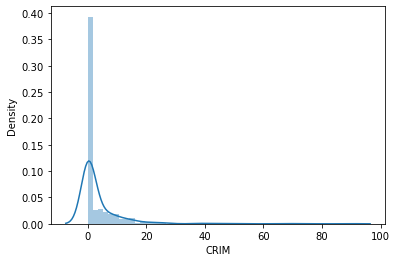

In [8]:
import seaborn as sns
sns.distplot(df['CRIM'])

In [9]:
#Filter only skewed columns
left_skewed = skewness[skewness.skewness_type == "Left Skewed"].index.to_list()
right_skewed = skewness[skewness.skewness_type == "Right Skewed"].index.to_list()

In [10]:
for i in left_skewed:
    print(i)
    df[i] = np.square(df[i])
print("----------------------------")
# from numpy import exp
# from scipy.stats import boxcox
# we can also use log or boxcox transformation for right skewed data

#lambda = -1. is a reciprocal transform.
#lambda = -0.5 is a reciprocal square root transform.
#lambda = 0.0 is a log transform.
#lambda = 0.5 is a square root transform.
#lambda = 1.0 is no transform.
for i in right_skewed:
    print(i)
    df[i] = np.sqrt(df[i])

AGE
PTRATIO
B
----------------------------
CRIM
CHAS
ZN
Price
DIS
RAD
LSTAT
NOX
TAX


In [11]:
df.skew().sort_values(ascending = False)

CHAS       3.405904
CRIM       2.024382
ZN         1.476293
RAD        0.823844
DIS        0.564424
NOX        0.536789
TAX        0.521793
Price      0.438935
RM         0.403612
LSTAT      0.307391
INDUS      0.295022
AGE       -0.183180
PTRATIO   -0.610319
B         -2.409520
dtype: float64

In [12]:
df.sample(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
485,1.916682,0.000000,18.10,0.0,0.763544,6.312,2693.61,1.997924,4.898979,25.806976,408.04,151025.5044,3.252691,4.604346
366,1.922745,0.000000,18.10,0.0,0.847349,4.963,8353.96,1.323745,4.898979,25.806976,408.04,99874.9609,3.741657,4.679744
241,0.325761,5.477226,4.93,0.0,0.654217,6.095,4238.01,2.517161,2.449490,17.320508,275.56,155724.9444,3.521363,4.483302
437,3.895793,0.000000,18.10,0.0,0.860233,6.152,10000.00,1.383546,4.898979,25.806976,408.04,86.8624,5.142956,2.949576
24,0.866176,0.000000,8.14,0.0,0.733485,5.924,8854.81,2.097522,2.000000,17.521415,441.00,155496.1489,4.037326,3.949684
360,2.131178,0.000000,18.10,0.0,0.877496,6.398,7744.00,1.586884,4.898979,25.806976,408.04,140295.1936,2.791057,5.000000
155,1.880162,0.000000,19.58,1.0,0.933274,6.152,6822.76,1.321174,2.236068,20.074860,216.09,7745.7601,3.875564,3.949684
204,0.141739,9.746794,2.68,0.0,0.645058,8.034,1017.61,2.262300,2.000000,14.966630,216.09,152529.3025,1.697056,7.071068
55,0.114499,9.486833,1.22,0.0,0.634823,7.249,479.61,2.949000,2.236068,15.033296,320.41,156760.5649,2.193171,5.949790
105,0.364170,0.000000,8.56,0.0,0.721110,5.851,9350.89,1.451516,2.236068,19.595918,436.81,155275.4025,4.058325,4.415880


C:\Users\ashut\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CRIM', ylabel='Density'>

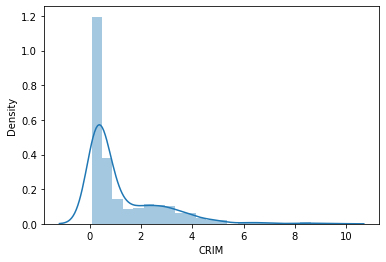

In [13]:
sns.distplot(df['CRIM'])